### Imbalanced 

In [1]:
!pip install imbalanced-learn

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('hcv.csv')
df.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,Activity
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active


In [6]:
x = df.drop(['Activity'],axis=1)
y = df['Activity']

In [7]:
y.value_counts()

Activity
active      412
inactive    166
Name: count, dtype: int64

<Axes: ylabel='count'>

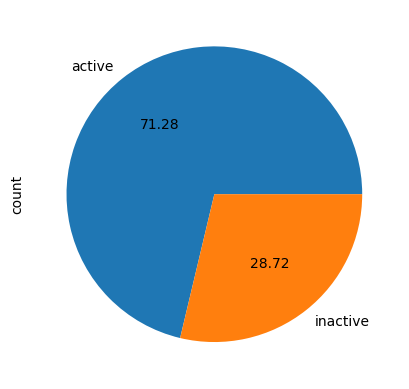

In [9]:
y.value_counts().plot.pie(autopct='%.2f')

In [10]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=.20)

In [11]:
y_train.value_counts()

Activity
active      329
inactive    133
Name: count, dtype: int64

<Axes: ylabel='count'>

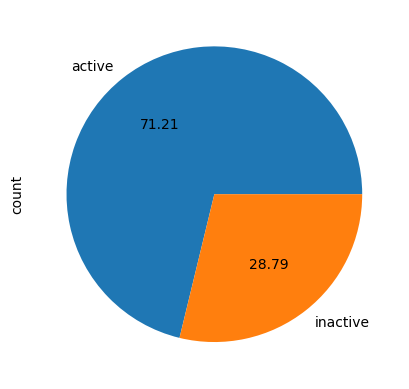

In [12]:
y_train.value_counts().plot.pie(autopct='%.2f')

----
### Oversampling 

In [15]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='not majority')
X_train_ros , y_train_ros = ros.fit_resample(X_train,y_train)

<Axes: ylabel='count'>

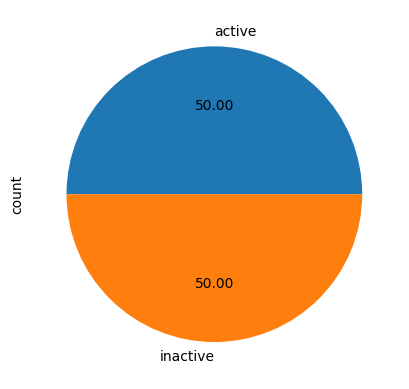

In [16]:
y_train_ros.value_counts().plot.pie(autopct='%.2f')

In [17]:
y_train_ros.value_counts()

Activity
active      329
inactive    329
Name: count, dtype: int64

------
### Under sampling 

In [18]:
from imblearn.under_sampling import RandomUnderSampler

In [19]:
rus = RandomUnderSampler(sampling_strategy=1)
X_train_rus , y_train_rus = rus.fit_resample(X_train,y_train)

<Axes: ylabel='count'>

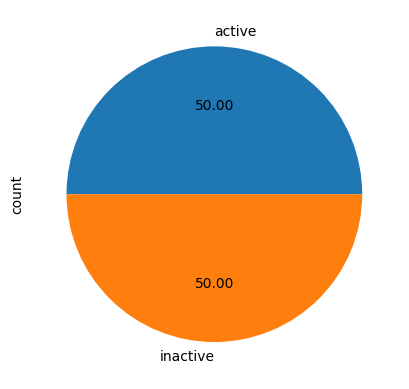

In [20]:
y_train_rus.value_counts().plot.pie(autopct='%.2f')

In [21]:
y_train_rus.value_counts()

Activity
active      133
inactive    133
Name: count, dtype: int64

--------
### Build Model

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [24]:
# main data
model1 = RandomForestClassifier(random_state=10)
model1.fit(X_train,y_train)

y_pred = model1.predict(X_test)
accuracy_score(y_test,y_pred)

0.896551724137931

In [25]:
# undersampling data
model2 = RandomForestClassifier(random_state=10)
model2.fit(X_train_rus,y_train_rus)

y_pred = model2.predict(X_test)
accuracy_score(y_test,y_pred)

0.9224137931034483

In [26]:
# oversampling data
model3 = RandomForestClassifier(random_state=10)
model3.fit(X_train_ros,y_train_ros)

y_pred = model2.predict(X_test)
accuracy_score(y_test,y_pred)

0.9224137931034483

In [27]:
## class weight
model4 = RandomForestClassifier(random_state=10,class_weight='balanced')
model4.fit(X_train,y_train)

y_pred = model4.predict(X_test)
accuracy_score(y_test,y_pred)

0.896551724137931